# Beispiel zur Fourierentwicklung

In [1]:
import numpy as np
from sympy import symbols, integrate, lambdify, exp, sin, cos, pi
import scipy.integrate as scint
import matplotlib.pyplot as plt

Für das Beispiel benutzen wir zwei verschiedene orthonormale Basen für den $L_2[-1,1]$ 

In [2]:
t = symbols('t')

def dot(x,y):
    return integrate(x*y,(t,-1,1))
def norm(x):
    return dot(x,x)**(1/2)
def dotN(x,y):
    xy = lambdify(t, x*y,'numpy')
    return scint.quad(xy, -1, 1)[0]
def normN(x):
    return dotN(x,x)**(1/2)

## Legendre'sche Polynome

In [3]:
# Orthonormalbasis nach Schmidt
N = 9
yi = [t**i for i in range(N)]
xi = [yi[0]/norm(yi[0])]
for i in range(1,N):
    s = 0
    for j in range(i):
        s += dot(yi[i],xi[j])*xi[j]
    zi=yi[i]-s
    xi.append(zi/norm(zi))

In [4]:
xi

[0.707106781186547,
 1.22474487139159*t,
 2.37170824512628*t**2 - 0.790569415042095,
 4.67707173346743*t**3 - 2.80624304008046*t,
 9.2807765030735*t**4 - 7.95495128834872*t**2 + 0.795495128834872,
 18.4685120543048*t**5 - 20.5205689492276*t**3 + 4.39726477483448*t,
 36.8085471137468*t**6 - 50.1934733369281*t**4 + 16.7311577789763*t**2 - 0.796721798998898,
 73.4290553655431*t**7 - 118.616166359723*t**5 + 53.9164392544196*t**3 - 5.99071547271328*t,
 146.570997825634*t**8 - 273.599195941123*t**6 + 157.845689965986*t**4 - 28.6992163574405*t**2 + 0.797200454372895]

In [5]:
f = exp(-5*t**2)
fn = lambdify(t, f, 'numpy')

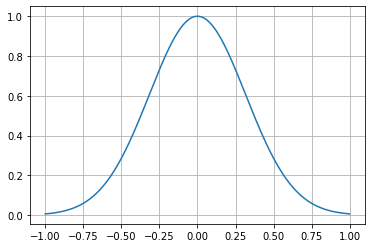

In [6]:
tp = np.linspace(-1,1,400)
plt.plot(tp, fn(tp))
plt.grid()
plt.show()

In [7]:
alpha = [dotN(f, xii) for xii in xi]
alpha

[0.5596217150491691,
 0.0,
 -0.4411693576778274,
 0.0,
 0.2148123794839546,
 0.0,
 -0.07762200243541717,
 0.0,
 0.0221421344164393]

In [8]:
s = 0
for alphai, xii in zip(alpha,xi):
    s += alphai*xii
sn = lambdify(t, s, 'numpy')
s

3.24539473540683*t**8 - 8.91522330646548*t**6 + 9.38478407796753*t**4 - 4.68931489413068*t**2 + 0.994864373177097

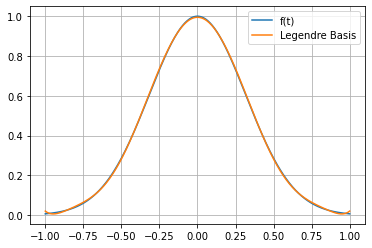

In [9]:
tp = np.linspace(-1,1,400)
plt.plot(tp, fn(tp),label='f(t)') 
plt.plot(tp, sn(tp),label='Legendre Basis')
plt.legend()
plt.grid()
plt.show()

Parsevallsche Gleichung (Vollständigkeitsrelation):

$$\sum_{k=1}^N |(x,x_k)|^2 \le \sum_{k=1}^\infty |(x,x_k)|^2 = \|x\|^2$$

In [10]:
np.sum(np.array(alpha)**2)-normN(f)**2

-2.810714668699532e-05

## Trigonometrische Funktionen

In [11]:
# Orthonormalbasis nach Schmidt
yi = []
N = 5
yi.append(1/2)
for i in range(1,N):
    yi.append(cos(pi*i*t))
    yi.append(sin(pi*i*t))
print('Anzahl Basisfunktionen: '+str(len(yi)))
xi = [yi[0]/normN(yi[0])]
for i in range(1,2*N-1):
    s = 0
    for j in range(i):
        s += dotN(yi[i],xi[j])*xi[j]
    zi=yi[i]-s
    xi.append(zi/normN(zi))

Anzahl Basisfunktionen: 9


In [12]:
xi

[0.7071067811865475,
 1.0*cos(pi*t) - 9.81307786677359e-17,
 1.0*sin(pi*t),
 -1.22011185168313e-17*cos(pi*t) + 1.0*cos(2*pi*t) + 1.03037317601123e-16,
 -9.90337261694782e-18*sin(pi*t) + 1.0*sin(2*pi*t),
 1.23822596516741e-33*cos(pi*t) - 1.01484627287186e-16*cos(2*pi*t) + 1.0*cos(3*pi*t) - 1.58362563377161e-17,
 2.04850984122971e-34*sin(pi*t) - 2.0684971882448e-17*sin(2*pi*t) + 1.0*sin(3*pi*t),
 -4.42531299261824e-17*cos(pi*t) + 1.31330734865152e-16*cos(2*pi*t) + 8.86382073502645e-17*cos(3*pi*t) + 1.0*cos(4*pi*t) - 3.92523114670944e-17,
 7.95881701368516e-17*sin(pi*t) - 1.53007052862912e-17*sin(2*pi*t) - 6.41357085318366e-17*sin(3*pi*t) + 1.0*sin(4*pi*t)]

In [13]:
alpha2 = [dotN(f, xii) for xii in xi]
alpha2

[0.5596217150491691,
 0.4850805845912827,
 0.0,
 0.10914699708164807,
 0.0,
 0.010077740674845966,
 0.0,
 -0.00025517128989830523,
 0.0]

In [14]:
s2 = 0
for alphai, xii in zip(alpha2,xi):
    s2 += alphai*xii
s2n = lambdify(t, s2, 'numpy')
s2

0.485080584591283*cos(pi*t) + 0.109146997081648*cos(2*pi*t) + 0.010077740674846*cos(3*pi*t) - 0.000255171289898305*cos(4*pi*t) + 0.395712309610513

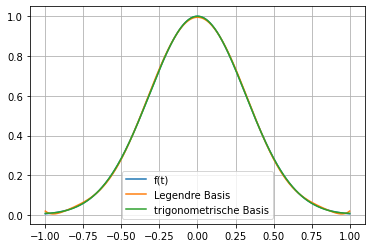

In [15]:
tp = np.linspace(-1,1,400)
plt.plot(tp, fn(tp),label='f(t)') 
plt.plot(tp, sn(tp),label='Legendre Basis')
plt.plot(tp, s2n(tp),label='trigonometrische Basis')
plt.legend()
plt.grid()
plt.show()

Parsevallsche Gleichung (Vollständigkeitsrelation):

$$\sum_{k=1}^N |(x,x_k)|^2 \le \sum_{k=1}^\infty |(x,x_k)|^2 = \|x\|^2$$

In [16]:
np.sum(np.array(alpha2)**2)-normN(f)**2

-4.505698535384184e-07

## Vergleich

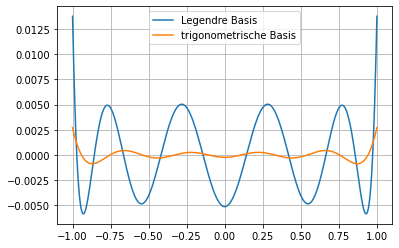

In [17]:
plt.plot(tp, sn(tp)-fn(tp),label='Legendre Basis')
plt.plot(tp, s2n(tp)-fn(tp),label='trigonometrische Basis')
plt.legend()
plt.grid()
plt.show()